In [ ]:
import pandas as pd
import plotly.express as px

import constants.paths as pth
from src.utils.load_data import load_data

In [2]:
results_df = load_data(pth.RESULTS_PATH)

In [12]:
(9948 / len(results_df)) * 100

9.948

In [3]:
accepted_loans = results_df[results_df["accepted"] == 1]
accepted_loans[accepted_loans["default"] == 0]

,id,own,competing1,competing3,borrowertype,accepted,default,profit
2,3,0.027934,0.052648,0.100135,3,1,0,279.33716
8,9,0.019590,0.029731,0.023822,2,1,0,195.89999
9,10,0.112551,0.184670,NaN,2,1,0,1125.51480
15,16,0.045453,0.087521,0.108777,3,1,0,454.52576
19,20,0.088848,0.109757,0.115288,3,1,0,888.47675
...,...,...,...,...,...,...,...,...
99993,99994,0.019590,0.019154,0.093524,2,1,0,195.89999
99994,99995,0.019590,0.017227,0.003076,2,1,0,195.89999
99997,99998,0.203107,0.223306,NaN,3,1,0,2031.06920
99998,99999,0.019590,0.045920,0.010895,2,1,0,195.89999


In [3]:
results_df.describe()

,id,own,competing1,competing3,borrowertype,accepted,default,profit
count,100000.000000,82500.000000,99996.000000,79949.000000,100000.000000,100000.000000,100000.000000,37486.000000
mean,50000.500000,0.099886,0.148996,0.117509,1.999990,0.374860,0.099480,-41.003373
std,28867.657797,0.067675,0.110063,0.088607,0.816503,0.484089,0.299307,2862.766592
min,1.000000,0.019590,0.015990,0.000735,1.000000,0.000000,0.000000,-10000.000000
25%,25000.750000,0.028862,0.062482,0.067531,1.000000,0.000000,0.000000,202.033820
50%,50000.500000,0.095242,0.125094,0.103981,2.000000,0.000000,0.000000,450.832675
75%,75000.250000,0.166050,0.202503,0.140204,3.000000,1.000000,0.000000,1065.763650
max,100000.000000,0.235181,1.000000,0.971516,3.000000,1.000000,1.000000,2351.813500


In [4]:
mask_negative_profit = results_df["profit"] < 0
results_df_negative_profit = results_df[mask_negative_profit]
results_df_negative_profit

,id,own,competing1,competing3,borrowertype,accepted,default,profit
26,27,0.222255,0.350919,NaN,1,1,1,-10000.0
66,67,0.086589,0.130304,0.122708,3,1,1,-10000.0
124,125,0.098288,0.107331,0.139148,2,1,1,-10000.0
127,128,0.103330,0.183085,0.123180,1,1,1,-10000.0
141,142,0.095246,0.089732,0.080308,2,1,1,-10000.0
...,...,...,...,...,...,...,...,...
99928,99929,0.125799,0.169104,0.136804,2,1,1,-10000.0
99935,99936,0.160190,0.171931,0.249357,3,1,1,-10000.0
99958,99959,0.183011,0.170173,0.202342,2,1,1,-10000.0
99971,99972,0.180847,0.208555,NaN,3,1,1,-10000.0


In [5]:
mask_positive_profit = results_df["profit"] > 0
results_df_positive_profit = results_df[mask_positive_profit]
results_df_positive_profit

,id,own,competing1,competing3,borrowertype,accepted,default,profit
2,3,0.027934,0.052648,0.100135,3,1,0,279.33716
8,9,0.019590,0.029731,0.023822,2,1,0,195.89999
9,10,0.112551,0.184670,NaN,2,1,0,1125.51480
15,16,0.045453,0.087521,0.108777,3,1,0,454.52576
19,20,0.088848,0.109757,0.115288,3,1,0,888.47675
...,...,...,...,...,...,...,...,...
99993,99994,0.019590,0.019154,0.093524,2,1,0,195.89999
99994,99995,0.019590,0.017227,0.003076,2,1,0,195.89999
99997,99998,0.203107,0.223306,NaN,3,1,0,2031.06920
99998,99999,0.019590,0.045920,0.010895,2,1,0,195.89999


In [6]:
results_df.columns.tolist()

['id',
 'own',
 'competing1',
 'competing3',
 'borrowertype',
 'accepted',
 'default',
 'profit']

In [7]:
rates_data = pd.DataFrame(
    {
        "Own Rate": results_df["own"],
        "Competing1 Rate": results_df["competing1"],
        "Competing3 Rate": results_df["competing3"],
    }
)

rates_long = rates_data.melt(var_name="Rate Type", value_name="Interest Rate")

# Create histogram
fig = px.histogram(
    rates_long,
    x="Interest Rate",
    color="Rate Type",
    barmode="overlay",
    opacity=0.7,
    title="Distribution of Interest Rates: Own vs Competing Lenders",
    labels={"Interest Rate": "Interest Rate (%)", "count": "Frequency"},
    nbins=50,
)

fig.update_layout(
    xaxis_title="Interest Rate (%)", yaxis_title="Frequency", legend_title="Rate Type"
)

fig.show()

# Other teams' profit

In [8]:
results_df

,id,own,competing1,competing3,borrowertype,accepted,default,profit
0,1,0.029193,0.054436,0.025796,3,0,0,NaN
1,2,0.173636,0.186897,0.110289,1,0,1,NaN
2,3,0.027934,0.052648,0.100135,3,1,0,279.33716
3,4,0.111224,0.105168,0.090256,3,0,0,NaN
4,5,0.197088,0.127306,0.194219,1,0,0,NaN
...,...,...,...,...,...,...,...,...
99995,99996,0.100060,0.160974,0.066152,3,0,0,NaN
99996,99997,0.185697,0.200041,0.142413,3,0,0,NaN
99997,99998,0.203107,0.223306,NaN,3,1,0,2031.06920
99998,99999,0.019590,0.045920,0.010895,2,1,0,195.89999


In [9]:
def compute_winner(row):
    """Compute the winner of the loan per row

    Args:
        row (pd.Series): A row from the DataFrame containing loan information.

    Returns:
        int: The winning loan option (1, 2, or 3).
    """
    borrower_type = row["borrowertype"]
    own_rate = row["own"]
    competing1_rate = row["competing1"]
    competing3_rate = row["competing3"]

    if borrower_type == 1:
        competing1_rate -= 0.02
    elif borrower_type == 2:
        own_rate -= 0.02
    elif borrower_type == 3:
        competing3_rate -= 0.02

    if own_rate < min(competing1_rate, competing3_rate):
        return 2
    elif competing1_rate < min(own_rate, competing3_rate):
        return 1
    else:
        return 3


def update_results_with_winner(df):
    """Update the results DataFrame with the winning loan option.

    Args:
        df (pd.DataFrame): The results DataFrame.

    Returns:
        pd.DataFrame: The updated DataFrame with a new 'winner' column.
    """
    df["winner"] = df.apply(compute_winner, axis=1)
    return df


updated_results_df = update_results_with_winner(results_df)


In [12]:
team1_df = updated_results_df[updated_results_df["winner"] == 1]
team2_df = updated_results_df[updated_results_df["winner"] == 2]
team3_df = updated_results_df[updated_results_df["winner"] == 3]

In [19]:
# Compute profit for Team 1
team1_df.loc[:, "profit"] = team1_df["competing1"] * 10000
mask_defaults_1 = team1_df["default"] == 1
team1_df.loc[mask_defaults_1, "profit"] = -10000

# Compute profit for Team 2
team2_df.loc[:, "profit"] = team2_df["own"] * 10000
mask_defaults_2 = team2_df["default"] == 1
team2_df.loc[mask_defaults_2, "profit"] = -10000

# Compute profit for Team 3
team3_df.loc[:, "profit"] = team3_df["competing3"] * 10000
mask_defaults_3 = team3_df["default"] == 1
team3_df.loc[mask_defaults_3, "profit"] = -10000

In [22]:
team1_profit = team1_df["profit"].sum()
team2_profit = team2_df["profit"].sum()
team3_profit = team3_df["profit"].sum()

In [28]:
print(f"Team 1 Total Profit: ${team1_profit:_.2f}€".replace("_", " "))
print(f"Team 2 Total Profit: ${team2_profit:_.2f}€".replace("_", " "))
print(f"Team 3 Total Profit: ${team3_profit:_.2f}€".replace("_", " "))

Team 1 Total Profit: $1 300 820.34€
Team 2 Total Profit: $-1 537 052.36€
Team 3 Total Profit: $-19 599 096.85€


# Retroactively trying out new strategies in Round 1

In [ ]:
import numpy as np
import pandas as pd

import constants.constants as cst
import constants.paths as pth
from src.market_sim import compute_profit
from src.preprocessing import preprocess_data
from src.strategies import predict_rates
from src.utils.cumulative_probability import plot_cumulative_probability
from src.utils.load_data import load_data
from src.utils.model_utils import load_model


In [ ]:
data_to_predict = load_data(pth.NEW_LOANS_PATH)

# Load preprocessor
preprocessor = load_model(
    model_name="XGBoost_Calibrated_Optimized_preprocessor",
    model_type="sklearn",
)

preprocessed_data_to_predict, _, _ = preprocess_data(
    data_to_predict, preprocessor=preprocessor, fit=False
)

2025-10-26 11:05:00.732 | INFO     | src.utils.model_utils:load_model:67 - Model loaded from: /home/augustin/projects/xhec_dsb/05_intro_to_finance_for_data_scientists/models/XGBoost_Calibrated_Optimized_Full_Training_Set_preprocessor.pkl
2025-10-26 11:05:00.733 | INFO     | src.preprocessing:preprocess_data:67 - Applying log transformation to income
2025-10-26 11:05:00.735 | INFO     | src.preprocessing:preprocess_data:82 - Transforming data with existing preprocessor.


In [ ]:
# Make predictions
model = load_model(model_name="XGBoost_Calibrated_Optimized", model_type="sklearn")

proba_predictions = model.predict_proba(preprocessed_data_to_predict)[:, 1]

2025-10-26 11:05:00.799 | INFO     | src.utils.model_utils:load_model:67 - Model loaded from: /home/augustin/projects/xhec_dsb/05_intro_to_finance_for_data_scientists/models/XGBoost_Calibrated_Optimized_Full_Training_Set.pkl


In [ ]:
data_to_predict[cst.DEFAULT_PROBABILITY] = proba_predictions

The function
$$
f : x \mapsto \frac{x}{1-x}
$$
is strictly growing on $[0,1[$ and $f(\frac{1}{2})=1$.

Thus, any predicted default probability above $0.5$ gives a break even interest rate above $100\%$. We cannot fix interest rates above $100\%$.

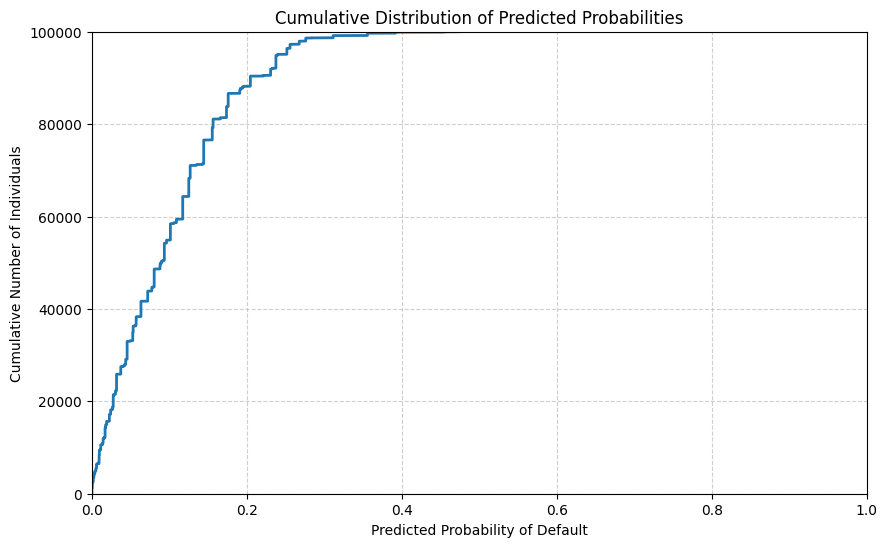

In [ ]:
plot_cumulative_probability(data_to_predict[cst.DEFAULT_PROBABILITY])

In [ ]:
data_to_predict_with_rates = predict_rates(
    data_to_predict,
    linear_params={"alpha_0": 0.2, "alpha_1": 0.1, "delta": 0.05},
    quadratic_params={"beta_0": 0.2, "beta_1": 0.1, "beta_2": 0.2, "gamma": 0.05},
)

In [ ]:
data_to_predict_with_rates.describe()

,id,married,income,signal2,default_probability,break_even_rate,linear_rate,quadratic_rate
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,0.610960,7.850842,0.415483,0.099586,0.119570,0.329446,0.332573
std,28867.657797,0.487535,3.660144,0.324584,0.076821,0.106183,0.113268,0.117322
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000
25%,25000.750000,0.000000,8.587465,0.059857,0.031801,0.032846,0.236026,0.236228
50%,50000.500000,1.000000,9.143132,0.446035,0.089800,0.098660,0.307640,0.309253
75%,75000.250000,1.000000,9.766694,0.692073,0.144261,0.168580,0.383006,0.387168
max,100000.000000,1.000000,13.815512,0.999987,0.472727,0.896552,1.000000,1.000000


## Comparing new rates with round 1 rates

In [ ]:
round_1_results = load_data(pth.RESULTS_PATH)

In [ ]:
# Comparing linear rates
comparison_linear = round_1_results.copy()
comparison_linear = comparison_linear.drop(columns=[cst.PROFIT])

comparison_linear[cst.BANK_2_RATE] = data_to_predict_with_rates[cst.LINEAR_RATE]

comparison_linear = compute_profit(comparison_linear)

In [ ]:
comparison_linear

,id,own,competing1,competing3,borrowertype,accepted,default,winner,profit_competing1,profit_own,profit_competing3
0,1,0.225330,0.054436,0.025796,3,0,0,competing3,<NA>,<NA>,257.95907
1,2,0.322817,0.186897,0.110289,1,0,1,competing3,<NA>,<NA>,-10000
2,3,0.236026,0.052648,0.100135,3,1,0,competing1,526.47717,<NA>,<NA>
3,4,0.305092,0.105168,0.090256,3,0,0,competing3,<NA>,<NA>,902.56438
4,5,0.522724,0.127306,0.194219,1,0,0,competing1,1273.0633,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,0.316157,0.160974,0.066152,3,0,0,competing3,<NA>,<NA>,661.5223
99996,99997,0.344462,0.200041,0.142413,3,0,0,competing3,<NA>,<NA>,1424.1314
99997,99998,0.344462,0.223306,NaN,3,1,0,competing1,2233.0594,<NA>,<NA>
99998,99999,0.210639,0.045920,0.010895,2,1,0,competing3,<NA>,<NA>,108.95047


In [ ]:
comparison_linear["profit_own"].sum()

601494.050779281

In [ ]:
# Comparing quadratic rates
comparison_quadratic = round_1_results.copy()
comparison_quadratic = comparison_quadratic.drop(columns=[cst.PROFIT])

comparison_quadratic[cst.BANK_2_RATE] = data_to_predict_with_rates[cst.QUADRATIC_RATE]

comparison_quadratic = compute_profit(comparison_quadratic)

In [ ]:
comparison_quadratic

,id,own,competing1,competing3,borrowertype,accepted,default,winner,profit_competing1,profit_own,profit_competing3
0,1,0.225431,0.054436,0.025796,3,0,0,competing3,<NA>,<NA>,257.95907
1,2,0.324868,0.186897,0.110289,1,0,1,competing3,<NA>,<NA>,-10000
2,3,0.236228,0.052648,0.100135,3,1,0,competing1,526.47717,<NA>,<NA>
3,4,0.306635,0.105168,0.090256,3,0,0,competing3,<NA>,<NA>,902.56438
4,5,0.533356,0.127306,0.194219,1,0,0,competing1,1273.0633,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,0.318010,0.160974,0.066152,3,0,0,competing3,<NA>,<NA>,661.5223
99996,99997,0.347209,0.200041,0.142413,3,0,0,competing3,<NA>,<NA>,1424.1314
99997,99998,0.347209,0.223306,NaN,3,1,0,competing1,2233.0594,<NA>,<NA>
99998,99999,0.210658,0.045920,0.010895,2,1,0,competing3,<NA>,<NA>,108.95047


In [ ]:
comparison_quadratic["profit_own"].sum()

572123.5237709528

## Optimize Parameters Using Market Simulation

Now let's use the optimization function to find the best parameters.

In [ ]:
from src.market_sim import optimize_rate_params

# Define parameter grids to test
linear_param_grid = {
    "alpha_0": [0.05, 0.1, 0.15, 0.2, 0.25],
    "alpha_1": [0.0, 0.05, 0.1, 0.15, 0.2],
    "delta": [0.05, 0.1],
}

quadratic_param_grid = {
    "beta_0": [0.05, 0.1, 0.15, 0.2, 0.25],
    "beta_1": [0.0, 0.05, 0.1, 0.15],
    "beta_2": [0.0, 0.1, 0.2, 0.3],
    "gamma": [0.05, 0.1],
}

# Run optimization
best_linear, best_quadratic, optimization_results = optimize_rate_params(
    predictions_df=data_to_predict,
    market_results_df=round_1_results,
    linear_param_grid=linear_param_grid,
    quadratic_param_grid=quadratic_param_grid,
    strategy="both",
    verbose=True,
)

Optimizing linear strategy...
  Tested 5/50 linear combinations
  Tested 10/50 linear combinations
  Tested 15/50 linear combinations
  Tested 20/50 linear combinations
  Tested 25/50 linear combinations
  Tested 30/50 linear combinations
  Tested 35/50 linear combinations
  Tested 40/50 linear combinations
  Tested 45/50 linear combinations
  Tested 50/50 linear combinations
Optimizing quadratic strategy...
  Tested 16/160 quadratic combinations
  Tested 32/160 quadratic combinations
  Tested 48/160 quadratic combinations
  Tested 64/160 quadratic combinations
  Tested 80/160 quadratic combinations
  Tested 96/160 quadratic combinations
  Tested 112/160 quadratic combinations
  Tested 128/160 quadratic combinations
  Tested 144/160 quadratic combinations
  Tested 160/160 quadratic combinations

Best linear parameters: {'alpha_0': np.float64(0.05), 'alpha_1': np.float64(0.2), 'delta': np.float64(0.05)}
Best linear profit: $2,998,054.87

Best quadratic parameters: {'beta_0': np.float64(

In [ ]:
# View the optimization results sorted by profit
optimization_results.sort_values("total_profit", ascending=False).head(10)

,strategy,alpha_0,alpha_1,delta,total_profit,beta_0,beta_1,beta_2,gamma
73,quadratic,NaN,NaN,NaN,3.017996e+06,0.05,0.10,0.3,0.10
72,quadratic,NaN,NaN,NaN,3.017996e+06,0.05,0.10,0.3,0.05
9,linear,0.05,0.2,0.10,2.998055e+06,NaN,NaN,NaN,NaN
8,linear,0.05,0.2,0.05,2.998055e+06,NaN,NaN,NaN,NaN
71,quadratic,NaN,NaN,NaN,2.983006e+06,0.05,0.10,0.2,0.10
70,quadratic,NaN,NaN,NaN,2.983006e+06,0.05,0.10,0.2,0.05
80,quadratic,NaN,NaN,NaN,2.924069e+06,0.05,0.15,0.3,0.05
81,quadratic,NaN,NaN,NaN,2.924069e+06,0.05,0.15,0.3,0.10
69,quadratic,NaN,NaN,NaN,2.919462e+06,0.05,0.10,0.1,0.10
68,quadratic,NaN,NaN,NaN,2.919462e+06,0.05,0.10,0.1,0.05


In [ ]:
# Test the best parameters found
data_optimized = predict_rates(
    data_to_predict,
    linear_params=best_linear,
    quadratic_params=best_quadratic,
)

# Compare with round 1 results
comparison_optimized_linear = round_1_results.copy()
comparison_optimized_linear[cst.BANK_2_RATE] = data_optimized[cst.LINEAR_RATE]
comparison_optimized_linear = compute_profit(comparison_optimized_linear)

comparison_optimized_quadratic = round_1_results.copy()
comparison_optimized_quadratic[cst.BANK_2_RATE] = data_optimized[cst.QUADRATIC_RATE]
comparison_optimized_quadratic = compute_profit(comparison_optimized_quadratic)

print(
    f"Optimized Linear Profit: ${comparison_optimized_linear['profit_own'].sum():,.2f}"
)
print(
    f"Optimized Quadratic Profit: ${comparison_optimized_quadratic['profit_own'].sum():,.2f}"
)

Optimized Linear Profit: $2,998,054.87
Optimized Quadratic Profit: $3,017,996.12


## Analyze Adverse Selection and Winner's Curse

Before finalizing our strategy, let's analyze if we're experiencing adverse selection in Round 1 results.

In [ ]:
from src.market_sim import (
    analyze_adverse_selection,
    analyze_risk_segment_performance,
    suggest_risk_based_markup,
)

# Analyze adverse selection patterns
# Using the rates from earlier in the notebook
adverse_selection = analyze_adverse_selection(
    predictions_df=data_to_predict,
    market_results_df=round_1_results,
    our_rates=data_to_predict_with_rates[cst.LINEAR_RATE],
    bank_name=cst.BANK_2_RATE,
)

print("Adverse Selection Analysis (by how competitive our pricing was):")
print("=" * 70)
adverse_selection

Adverse Selection Analysis (by how competitive our pricing was):


/home/augustin/projects/xhec_dsb/05_intro_to_finance_for_data_scientists/src/market_sim.py:47: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df[cst.WINNER] = rates_df.idxmin(axis=1)


,win_rate,loan_count,actual_default_rate_when_won,predicted_default_rate_when_won
rate_gap_quintile,,,,
Much Cheaper,0.7550,20000,0.0944,0.0741
Cheaper,0.5973,19999,0.0515,0.0470
Similar,0.3436,20000,0.0448,0.0430
More Exp,0.1493,19999,0.0881,0.0762
Much More Exp,0.0291,20000,0.2405,0.1640


In [ ]:
# Analyze performance by risk segment
risk_segment_analysis = analyze_risk_segment_performance(
    predictions_df=data_to_predict,
    market_results_df=round_1_results,
    our_rates=data_to_predict_with_rates[cst.LINEAR_RATE],
    bank_name=cst.BANK_2_RATE,
    n_segments=5,
)

print("\nRisk Segment Performance Analysis:")
print("=" * 70)
risk_segment_analysis


Risk Segment Performance Analysis:


/home/augustin/projects/xhec_dsb/05_intro_to_finance_for_data_scientists/src/market_sim.py:47: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df[cst.WINNER] = rates_df.idxmin(axis=1)


,avg_pred_default,min_pred_default,max_pred_default,loans_won,win_rate,actual_default_rate,total_profit,avg_profit_per_loan,avg_rate_charged,expected_default_rate,prediction_error
risk_segment,,,,,,,,,,,
Q1,0.0133,0.0000,0.0275,12523,0.5889,0.0142,2.486110e+07,1169.1640,0.2159,0.0133,0.0009
Q2,0.0467,0.0281,0.0633,10686,0.5240,0.0525,1.982472e+07,972.0384,0.2514,0.0467,0.0058
Q3,0.0952,0.0720,0.1172,8389,0.3701,0.1095,1.419516e+07,626.2204,0.3134,0.0952,0.0143
Q4,0.1398,0.1250,0.1564,5087,0.3034,0.1714,7.038979e+06,419.7865,0.3742,0.1398,0.0316
Q5,0.2232,0.1658,0.4727,801,0.0424,0.2772,4.082087e+05,21.5926,0.4569,0.2232,0.0540


In [ ]:
# Get suggestions for markup adjustments
suggestions = suggest_risk_based_markup(
    adverse_selection_analysis=adverse_selection,
    risk_segment_analysis=risk_segment_analysis,
    base_markup=0.05,
)

print("\nSuggested Adjustments:")
print("=" * 70)
for reason in suggestions["reasoning"]:
    print(reason)
print(f"\nSuggested adjustments: {suggestions['adjustments']}")


Suggested Adjustments:
  Adverse selection detected: When pricing much cheaper, actual defaults exceed predictions by >10%. Consider adding 2% markup.
  Risk segment Q5: Underestimating defaults by 5.40%. Consider higher markup.

Suggested adjustments: {'adverse_selection_penalty': 0.02}


### Key Insights for Winner's Curse Mitigation

**What to look for in the analysis above:**

1. **Adverse Selection Analysis**: 
   - If "actual_default_rate_when_won" > "predicted_default_rate_when_won" when you're "Much Cheaper", you're experiencing adverse selection
   - This means competitors see risk you're missing → increase your markup

2. **Risk Segment Analysis**:
   - Look at "prediction_error" (actual - predicted default rate)
   - Positive errors = you're underestimating risk in that segment
   - Negative "avg_profit_per_loan" = avoid that segment or charge much more

3. **Strategy Adjustment**:
   - If adverse selection is detected, add the suggested penalty to your base markup
   - Consider risk-dependent markups: higher for uncertain/high-risk segments

## Risk-Tiered Strategy (Winner's Curse Mitigation)

Based on the analysis above, we can use a risk-tiered approach that charges different markups for different risk levels.

In [ ]:
from src.strategies import risk_tiered_strategy

# Apply risk-tiered strategy
# More conservative (higher markup) for high-risk loans where adverse selection is likely
data_risk_tiered = risk_tiered_strategy(
    predictions=data_to_predict,
    low_risk_markup=0.05,  # Aggressive on low risk (we're confident)
    medium_risk_markup=0.10,  # Moderate on medium risk
    high_risk_markup=0.20,  # Conservative on high risk (more uncertainty)
    low_threshold=0.15,  # Below 15% default probability = low risk
    high_threshold=0.35,  # Above 35% default probability = high risk
    min_delta=0.05,
)

# Test on Round 1 results
comparison_tiered = round_1_results.copy()
comparison_tiered[cst.BANK_2_RATE] = data_risk_tiered["risk_tiered_rate"]
comparison_tiered = compute_profit(comparison_tiered)

print(f"Risk-Tiered Strategy Profit: ${comparison_tiered['profit_own'].sum():,.2f}")
print("\nFor comparison:")
print(f"Linear Strategy Profit: ${comparison_linear['profit_own'].sum():,.2f}")
print(f"Quadratic Strategy Profit: ${comparison_quadratic['profit_own'].sum():,.2f}")

Risk-Tiered Strategy Profit: $3,353,521.36

For comparison:
Linear Strategy Profit: $601,494.05
Quadratic Strategy Profit: $572,123.52


## Recommended Workflow for Round 2 Strategy Selection

### Step-by-Step Process:

**STEP 1: Analyze Historical Performance (Diagnostic)**
- Run `analyze_adverse_selection()` and `analyze_risk_segment_performance()` 
- Use your **Round 1 actual rates** to understand what went wrong/right
- Identifies if you experienced winner's curse in Round 1

**STEP 2: Get Markup Recommendations (Guidance)**
- Run `suggest_risk_based_markup()` based on Step 1 analysis
- This tells you how to adjust your strategy parameters

**STEP 3: Optimize Strategy Parameters (Search)**
- Run `optimize_rate_params()` with appropriate parameter grids
- Test linear, quadratic, AND risk-tiered strategies
- Grid should reflect insights from Step 2 (e.g., higher markups if adverse selection detected)

**STEP 4: Compare All Strategies (Selection)**
- Compare optimized linear, optimized quadratic, and risk-tiered on Round 1 data
- Choose the strategy that:
  - Maximizes profit on Round 1
  - Shows NO adverse selection patterns
  - Performs well across all risk segments

**STEP 5: Apply to Round 2 (Deployment)**
- Use winning strategy with optimal parameters on NEW Round 2 applicants

### STEP 1: Analyze Your Round 1 Performance (What Actually Happened)

In [ ]:
# Extract YOUR actual Round 1 rates (what you actually used in competition)
round_1_our_rates = round_1_results[cst.BANK_2_RATE]

# Analyze if you experienced adverse selection with your Round 1 strategy
adverse_selection_round1 = analyze_adverse_selection(
    predictions_df=data_to_predict,
    market_results_df=round_1_results,
    our_rates=round_1_our_rates,  # Your actual Round 1 rates
    bank_name=cst.BANK_2_RATE,
)

print("STEP 1: Your Round 1 Adverse Selection Analysis")
print("=" * 80)
print("\nDid you win worse loans when pricing aggressively?")
display(adverse_selection_round1)

/home/augustin/projects/xhec_dsb/05_intro_to_finance_for_data_scientists/src/market_sim.py:47: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df[cst.WINNER] = rates_df.idxmin(axis=1)


STEP 1: Your Round 1 Adverse Selection Analysis

Did you win worse loans when pricing aggressively?


,win_rate,loan_count,actual_default_rate_when_won,predicted_default_rate_when_won
rate_gap_quintile,,,,
Much Cheaper,1.0000,16500,0.0991,0.0754
Cheaper,0.7182,16500,0.0541,0.0489
Similar,0.3982,16500,0.0528,0.0533
More Exp,0.1555,16500,0.0503,0.0489
Much More Exp,0.0000,16500,NaN,NaN


In [ ]:
# Analyze which risk segments performed well/poorly in Round 1
risk_segment_round1 = analyze_risk_segment_performance(
    predictions_df=data_to_predict,
    market_results_df=round_1_results,
    our_rates=round_1_our_rates,  # Your actual Round 1 rates
    bank_name=cst.BANK_2_RATE,
    n_segments=5,
)

print("\nRisk Segment Performance (Round 1 Actual):")
print("=" * 80)
print("Which risk levels were profitable? Where did you underestimate defaults?")
display(risk_segment_round1)


Risk Segment Performance (Round 1 Actual):
Which risk levels were profitable? Where did you underestimate defaults?


/home/augustin/projects/xhec_dsb/05_intro_to_finance_for_data_scientists/src/market_sim.py:47: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df[cst.WINNER] = rates_df.idxmin(axis=1)


,avg_pred_default,min_pred_default,max_pred_default,loans_won,win_rate,actual_default_rate,total_profit,avg_profit_per_loan,avg_rate_charged,expected_default_rate,prediction_error
risk_segment,,,,,,,,,,,
Q1,0.0133,0.0000,0.0275,12523,0.5889,0.0142,1.015171e+06,47.7413,0.0227,0.0133,0.0009
Q2,0.0467,0.0281,0.0633,10686,0.5240,0.0525,-1.890872e+05,-9.2713,0.0536,0.0467,0.0058
Q3,0.0952,0.0720,0.1172,8389,0.3701,0.1095,-2.260859e+05,-9.9738,0.1202,0.0952,0.0143
Q4,0.1398,0.1250,0.1564,5087,0.3034,0.1714,-1.056201e+06,-62.9891,0.1818,0.1398,0.0316
Q5,0.2232,0.1658,0.4727,801,0.0424,0.2772,-1.080849e+06,-57.1727,0.1965,0.2232,0.0540


### STEP 2: Get Recommendations Based on Round 1 Results

In [ ]:
# Get automated suggestions for how to adjust your strategy
suggestions_round1 = suggest_risk_based_markup(
    adverse_selection_analysis=adverse_selection_round1,
    risk_segment_analysis=risk_segment_round1,
    base_markup=0.05,
)

print("\nSTEP 2: Recommended Adjustments for Round 2")
print("=" * 80)
if suggestions_round1["reasoning"]:
    for reason in suggestions_round1["reasoning"]:
        print(f"  {reason}")
    print(f"\n  Suggested parameter adjustments: {suggestions_round1['adjustments']}")
else:
    print("   No major issues detected in Round 1 strategy!")
    print("   Consider slight optimization but your approach is sound.")


STEP 2: Recommended Adjustments for Round 2
    Adverse selection detected: When pricing much cheaper, actual defaults exceed predictions by >10%. Consider adding 2% markup.
   Risk segment Q2: Negative profit. Consider avoiding or increasing markup significantly.
   Risk segment Q3: Negative profit. Consider avoiding or increasing markup significantly.
   Risk segment Q4: Negative profit. Consider avoiding or increasing markup significantly.
    Risk segment Q5: Underestimating defaults by 5.40%. Consider higher markup.

  Suggested parameter adjustments: {'adverse_selection_penalty': 0.02}


### STEP 3: Optimize Strategy Parameters (Grid Search)

Now use the insights from Steps 1-2 to define your parameter grids and optimize.

In [ ]:
# Define parameter grids based on Step 2 recommendations
# If adverse selection detected, test HIGHER markups
# If no issues, can test a wider range including lower markups

print("STEP 3: Optimizing Strategy Parameters")
print("=" * 80)

# PHASE 1: COARSE GRID - Quick exploration (reasonable number of tests)
# Start with ~10-15 values per parameter = manageable number of combinations
# Linear: 10 × 10 × 3 = 300 combinations
# Quadratic: 10 × 8 × 8 × 3 = 1,920 combinations
# Total: ~2,220 simulations (very reasonable!)

linear_param_grid_optimized = {
    "alpha_0": [
        0.00,
        0.05,
        0.10,
        0.15,
        0.20,
        0.25,
        0.30,
        0.35,
        0.40,
        0.50,
    ],  # Base markup
    "alpha_1": [
        0.00,
        0.05,
        0.10,
        0.15,
        0.20,
        0.25,
        0.30,
        0.40,
        0.50,
        0.60,
    ],  # Risk component
    "delta": [0.03, 0.05, 0.10],  # Minimum markup (fewer values needed)
}

quadratic_param_grid_optimized = {
    "beta_0": [0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.50],
    "beta_1": [0.00, 0.05, 0.10, 0.15, 0.20, 0.30, 0.40, 0.50],
    "beta_2": [0.00, 0.05, 0.10, 0.15, 0.20, 0.30, 0.40, 0.50],
    "gamma": [0.03, 0.05, 0.10],
}

print(
    f"Linear combinations: {len(linear_param_grid_optimized['alpha_0']) * len(linear_param_grid_optimized['alpha_1']) * len(linear_param_grid_optimized['delta'])}"
)
print(
    f"Quadratic combinations: {len(quadratic_param_grid_optimized['beta_0']) * len(quadratic_param_grid_optimized['beta_1']) * len(quadratic_param_grid_optimized['beta_2']) * len(quadratic_param_grid_optimized['gamma'])}"
)

# Run optimization
best_linear_opt, best_quadratic_opt, optimization_results_v2 = optimize_rate_params(
    predictions_df=data_to_predict,
    market_results_df=round_1_results,
    linear_param_grid=linear_param_grid_optimized,
    quadratic_param_grid=quadratic_param_grid_optimized,
    strategy="both",
    verbose=True,
)

STEP 3: Optimizing Strategy Parameters
Linear combinations: 300
Quadratic combinations: 1920
Optimizing linear strategy...
  Tested 30/300 linear combinations
  Tested 60/300 linear combinations
  Tested 90/300 linear combinations
  Tested 120/300 linear combinations
  Tested 150/300 linear combinations
  Tested 180/300 linear combinations
  Tested 210/300 linear combinations
  Tested 240/300 linear combinations
  Tested 270/300 linear combinations
  Tested 300/300 linear combinations
Optimizing quadratic strategy...
  Tested 192/1920 quadratic combinations
  Tested 384/1920 quadratic combinations
  Tested 576/1920 quadratic combinations
  Tested 768/1920 quadratic combinations
  Tested 960/1920 quadratic combinations
  Tested 1152/1920 quadratic combinations
  Tested 1344/1920 quadratic combinations
  Tested 1536/1920 quadratic combinations
  Tested 1728/1920 quadratic combinations
  Tested 1920/1920 quadratic combinations

Best linear parameters: {'alpha_0': np.float64(0.0), 'alpha_1

#### Optional: Phase 2 - Fine-Tuning (Run only if you want to refine further)

If Phase 1 found promising parameters, you can create a narrower grid around those values.
For example, if best alpha_0 was 0.15, test [0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18] in that region.

In [ ]:
# PHASE 2: FINE GRID (Optional - only if you want to refine)
# Uncomment and adjust based on Phase 1 results

# Example: If Phase 1 found alpha_0=0.15 was best, zoom in around that
linear_param_grid_fine = {
    "alpha_0": np.linspace(0.0, 0.15, 20),  # Around best value
    "alpha_1": np.linspace(0.45, 0.70, 30),  # Around best value
    "delta": np.linspace(0.01, 0.07, 10),
}

quadratic_param_grid_fine = {
    "beta_0": np.linspace(0.0, 0.15, 20),
    "beta_1": np.linspace(0.4, 0.6, 20),
    "beta_2": np.linspace(0.4, 0.6, 20),
    "gamma": np.linspace(0.01, 0.07, 10),
}

best_linear_fine, _, _ = optimize_rate_params(
    predictions_df=data_to_predict,
    market_results_df=round_1_results,
    linear_param_grid=linear_param_grid_fine,
    quadratic_param_grid=quadratic_param_grid_fine,
    strategy="both",
    verbose=True,
)

Optimizing linear strategy...
  Tested 600/6000 linear combinations
  Tested 1200/6000 linear combinations
  Tested 1800/6000 linear combinations
  Tested 2400/6000 linear combinations
  Tested 3000/6000 linear combinations
  Tested 3600/6000 linear combinations
  Tested 4200/6000 linear combinations
  Tested 4800/6000 linear combinations
  Tested 5400/6000 linear combinations
  Tested 6000/6000 linear combinations
Optimizing quadratic strategy...
  Tested 8000/80000 quadratic combinations
  Tested 16000/80000 quadratic combinations
  Tested 24000/80000 quadratic combinations
  Tested 32000/80000 quadratic combinations
  Tested 40000/80000 quadratic combinations


KeyboardInterrupt: 

In [ ]:
best_quadratic_fine = {
    "beta_0": np.float64(0.03368421052631579),
    "beta_1": np.float64(0.2844827586206896),
    "beta_2": np.float64(0.368421052631579),
    "gamma": np.float64(0.01),
}

### STEP 4: Test Risk-Tiered Strategy as Alternative

In [ ]:
# Test risk-tiered strategy with parameters informed by risk segment analysis
# Adjust thresholds based on where segments became unprofitable in Step 1

data_tiered_opt = risk_tiered_strategy(
    predictions=data_to_predict,
    low_risk_markup=0.05,  # Competitive on low risk
    medium_risk_markup=0.12,  # More conservative on medium
    high_risk_markup=0.25,  # Very conservative on high risk
    low_threshold=0.15,
    high_threshold=0.35,
    min_delta=0.05,
)

comparison_tiered_opt = round_1_results.copy()
comparison_tiered_opt[cst.BANK_2_RATE] = data_tiered_opt["risk_tiered_rate"]
comparison_tiered_opt = compute_profit(comparison_tiered_opt)

print(f"\nRisk-Tiered Profit: ${comparison_tiered_opt['profit_own'].sum():,.2f}")


Risk-Tiered Profit: $2,335,811.79


### STEP 5: Compare ALL Strategies and Check for Adverse Selection

In [ ]:
# Generate rates for all strategies
data_all_strategies = predict_rates(
    data_to_predict,
    linear_params=best_linear_fine,
    quadratic_params=best_quadratic_fine,
)

# Calculate profits for each strategy
strategies_comparison = pd.DataFrame(
    {
        "Strategy": [
            "Round 1 Actual",
            "Optimized Linear",
            "Optimized Quadratic",
            "Risk-Tiered",
        ],
        "Total_Profit": [
            round_1_results["profit"].sum(),
            0,
            0,
            0,
        ],
    }
)

# Optimized Linear
comp_lin = round_1_results.copy()
comp_lin[cst.BANK_2_RATE] = data_all_strategies[cst.LINEAR_RATE]
comp_lin = compute_profit(comp_lin)
strategies_comparison.loc[1, "Total_Profit"] = comp_lin[
    f"profit_{cst.BANK_2_RATE}"
].sum()

# Optimized Quadratic
comp_quad = round_1_results.copy()
comp_quad[cst.BANK_2_RATE] = data_all_strategies[cst.QUADRATIC_RATE]
comp_quad = compute_profit(comp_quad)
strategies_comparison.loc[2, "Total_Profit"] = comp_quad[
    f"profit_{cst.BANK_2_RATE}"
].sum()

# Risk-Tiered
strategies_comparison.loc[3, "Total_Profit"] = comparison_tiered_opt[
    f"profit_{cst.BANK_2_RATE}"
].sum()

print("\nSTEP 5: Strategy Performance Comparison on Round 1 Data")
print("=" * 80)
strategies_comparison = strategies_comparison.sort_values(
    "Total_Profit", ascending=False
)
display(strategies_comparison)


STEP 5: Strategy Performance Comparison on Round 1 Data


,Strategy,Total_Profit
2,Optimized Quadratic,3.391523e+06
1,Optimized Linear,3.180734e+06
3,Risk-Tiered,2.335812e+06
0,Round 1 Actual,-1.537052e+06


In [ ]:
# CRITICAL: Check if top strategies still show adverse selection
print("\nAdverse Selection Check for Top Strategies:")
print("=" * 80)

# Check round 1 rates
adverse_selection_round_1 = analyze_adverse_selection(
    predictions_df=data_to_predict,
    market_results_df=round_1_results,
    our_rates=round_1_our_rates,
    bank_name=cst.BANK_2_RATE,
)

# Check optimized linear
adverse_linear_opt = analyze_adverse_selection(
    predictions_df=data_to_predict,
    market_results_df=round_1_results,
    our_rates=data_all_strategies[cst.LINEAR_RATE],
    bank_name=cst.BANK_2_RATE,
)

# Check optimized quadratic
adverse_quadratic_opt = analyze_adverse_selection(
    predictions_df=data_to_predict,
    market_results_df=round_1_results,
    our_rates=data_all_strategies[cst.QUADRATIC_RATE],
    bank_name=cst.BANK_2_RATE,
)

# Check risk-tiered
adverse_tiered_opt = analyze_adverse_selection(
    predictions_df=data_to_predict,
    market_results_df=round_1_results,
    our_rates=data_tiered_opt["risk_tiered_rate"],
    bank_name=cst.BANK_2_RATE,
)

print("\nRound 1 - Adverse Selection:")
display(adverse_selection_round_1)

print("\nOptimized Linear - Adverse Selection:")
display(adverse_linear_opt)

print("\nOptimized Quadratic - Adverse Selection:")
display(adverse_quadratic_opt)

print("\nRisk-Tiered - Adverse Selection:")
display(adverse_tiered_opt)


Adverse Selection Check for Top Strategies:

Round 1 - Adverse Selection:


/home/augustin/projects/xhec_dsb/05_intro_to_finance_for_data_scientists/src/market_sim.py:47: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df[cst.WINNER] = rates_df.idxmin(axis=1)
/home/augustin/projects/xhec_dsb/05_intro_to_finance_for_data_scientists/src/market_sim.py:47: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df[cst.WINNER] = rates_df.idxmin(axis=1)
/home/augustin/projects/xhec_dsb/05_intro_to_finance_for_data_scientists/src/market_sim.py:47: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df[cst.WINNER] = rates_df.idxmin(axis=1)
/home/augustin/projects/xhec_dsb/05_intro_to_finance_for_data_scientists/src/market_sim.py:47: FutureWarning: Th

,win_rate,loan_count,actual_default_rate_when_won,predicted_default_rate_when_won
rate_gap_quintile,,,,
Much Cheaper,1.0000,16500,0.0991,0.0743
Cheaper,0.7182,16500,0.0541,0.0483
Similar,0.3982,16500,0.0528,0.0527
More Exp,0.1555,16500,0.0503,0.0480
Much More Exp,0.0000,16500,NaN,NaN



Optimized Linear - Adverse Selection:


,win_rate,loan_count,actual_default_rate_when_won,predicted_default_rate_when_won
rate_gap_quintile,,,,
Much Cheaper,0.8174,20000,0.0812,0.0605
Cheaper,0.5632,20000,0.0543,0.0447
Similar,0.3458,19999,0.0593,0.0602
More Exp,0.1244,19999,0.1141,0.1105
Much More Exp,0.0234,20000,0.2516,0.1792



Optimized Quadratic - Adverse Selection:


,win_rate,loan_count,actual_default_rate_when_won,predicted_default_rate_when_won
rate_gap_quintile,,,,
Much Cheaper,0.8270,20000,0.0800,0.0597
Cheaper,0.5567,19999,0.0539,0.0442
Similar,0.3434,20000,0.0604,0.0616
More Exp,0.1240,19999,0.1185,0.1132
Much More Exp,0.0232,20000,0.2565,0.1828



Risk-Tiered - Adverse Selection:


,win_rate,loan_count,actual_default_rate_when_won,predicted_default_rate_when_won
rate_gap_quintile,,,,
Much Cheaper,0.8023,20000,0.0952,0.0724
Cheaper,0.5704,19999,0.0468,0.0427
Similar,0.3201,20000,0.0409,0.0392
More Exp,0.1448,19999,0.0915,0.0817
Much More Exp,0.0368,20000,0.2228,0.1799



⚠️  KEY DECISION CRITERIA:
Choose strategy that:
  1. Has highest profit
  2. Shows NO adverse selection (actual defaults ≈ predicted when 'Much Cheaper')
  3. Has consistent performance across risk segments


### STEP 6: Final Decision and Export for Round 2

Based on the analysis above, select your winning strategy and prepare for Round 2.

In [ ]:
CHOSEN_STRATEGY = "optimized_quadratic"
# Options: "optimized_linear", "optimized_quadratic", "risk_tiered"

print(f"✓ Selected Strategy: {CHOSEN_STRATEGY}")
print("=" * 80)


if CHOSEN_STRATEGY == "optimized_linear":
    final_params = {"strategy_type": "linear", "parameters": best_linear_opt}
    print(f"\nFinal Linear Parameters: {best_linear_opt}")

elif CHOSEN_STRATEGY == "optimized_quadratic":
    final_params = {"strategy_type": "quadratic", "parameters": best_quadratic_fine}
    print(f"\nFinal Quadratic Parameters: {best_quadratic_fine}")

elif CHOSEN_STRATEGY == "risk_tiered":
    final_params = {
        "strategy_type": "risk_tiered",
        "parameters": {
            "low_risk_markup": 0.05,
            "medium_risk_markup": 0.12,
            "high_risk_markup": 0.25,
            "low_threshold": 0.15,
            "high_threshold": 0.35,
            "min_delta": 0.05,
        },
    }
    print(f"\nFinal Risk-Tiered Parameters: {final_params['parameters']}")

✓ Selected Strategy: optimized_quadratic

Final Quadratic Parameters: {'beta_0': np.float64(0.03368421052631579), 'beta_1': np.float64(0.2844827586206896), 'beta_2': np.float64(0.368421052631579), 'gamma': np.float64(0.01)}

✓ These parameters are now ready to use on Round 2 applicants!
